**IMPORTANDO BIBLIOTECAS**

In [1]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.linear_model import LogisticRegression, LinearRegression

#Funções de avaliação dos modelos
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/Iris.csv')

In [3]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]
mappingSize = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

**SEPARANDO O CONJUNTO DE DADOS**

In [4]:
#Vamos usar somente duas features SepalWidthCm e PetalLengthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

**TREINAMENTO DO MODELO - REGRESSÃO LOGÍSTICA**

In [5]:
model = LogisticRegression()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.62      0.71        16
           2       0.54      0.78      0.64         9

    accuracy                           0.79        38
   macro avg       0.79      0.80      0.78        38
weighted avg       0.82      0.79      0.79        38



**REGIÃO DE DECISÃO**

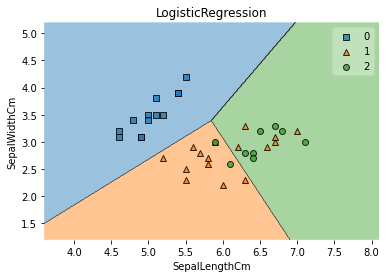

In [9]:
def show_decision_region(x, y, clf):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")

    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)

**REGRESSÃO LINEAR**

In [10]:
dataset_R = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/house.csv')

**SEPARANDO O CONJUNTO DE DADOS**

In [11]:
X = dataset_R.drop([dataset_R.columns[0]], axis = 1)
y = dataset_R[dataset_R.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y)

**TREINAMENTO DO MODELO**

In [12]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_pred = regression_model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

2004950634.1503146
